In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  error: subprocess-exited-with-error
  
  × Running setup.py install for tensorflow-gpu did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for tensorflow-gpu ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> tensorflow-gpu

note: This is an issue with the packag

In [ ]:
!nvidia-smi

Wed Feb  1 16:52:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    22W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install xlrd==1.2.0
!pip install openpyxl
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip "/content/drive/MyDrive/train/Chatbot Modified Datasets-20230129T174342Z-001.zip" -d "/content/"

Archive:  /content/drive/MyDrive/train/Chatbot Modified Datasets-20230129T174342Z-001.zip
replace /content/Chatbot Modified Datasets/bn_w2v_model.text? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/Chatbot Modified Datasets/bn_w2v_model.text  
  inflating: /content/Chatbot Modified Datasets/Shonar.ttf  
  inflating: /content/Chatbot Modified Datasets/Siyamrupali.ttf  
  inflating: /content/Chatbot Modified Datasets/Combind.csv  
  inflating: /content/Chatbot Modified Datasets/Chatbot/B.Sc in Information Technology.xlsx  
  inflating: /content/Chatbot Modified Datasets/Chatbot/INTERNATIONAL TUITION FEES.xlsx  
  inflating: /content/Chatbot Modified Datasets/Chatbot/ACADEMIC GUIDELINES (1).xlsx  
  inflating: /content/Chatbot Modified Datasets/Chatbot/SWE.xlsx  
  inflating: /content/Chatbot Modified Datasets/Chatbot/Daffodil Institute of languages (1).xlsx  
  inflating: /content/Chatbot Modified Datasets/Chatbot/Physically Challenged.xlsx  
  inflating: /content/Chatbot

In [ ]:
import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time
from collections import Counter

from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.models import Sequential

from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score


from nltk.corpus import stopwords
import nltk
import re
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

In [ ]:
file_path='/content/Chatbot Modified Datasets/Combind.csv'

In [ ]:
df=pd.read_csv(file_path,encoding='utf-8')

In [ ]:
df

,Category,Question,Answer
0,একাডেমিক গাইডলাইন্স,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার?,ছয় মাসের সেমিস্টার
1,একাডেমিক গাইডলাইন্স,এক বছরে কয়টা সেমিস্টার?,দুইটা
2,একাডেমিক গাইডলাইন্স,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল
3,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়?,জানুয়ারি
4,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে?,জুন
...,...,...,...
3677,ওয়েভার ফর ডিপ্লোমা হোল্ডার,"বিকাশ, রকেটে দেয়া যাবে?",হ্যা
3678,ওয়েভার ফর ডিপ্লোমা হোল্ডার,অনলাইনে টাকা দিলে কি এক্সট্রা চার্জ কাটে?,হ্যা
3679,ওয়েভার ফর ডিপ্লোমা হোল্ডার,প্রতি সেমিস্টারে কি ওয়েভার এর আবেদন করতে হবে?,না
3680,ওয়েভার ফর ডিপ্লোমা হোল্ডার,সব সিস্টেমেটিক্যালি হবে?,হ্যা


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   3682 non-null   object
 1   Question   3680 non-null   object
 2   Answer     3679 non-null   object
dtypes: object(3)
memory usage: 86.4+ KB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3679 entries, 0 to 3681
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Category   3679 non-null   object
 1   Question   3679 non-null   object
 2   Answer     3679 non-null   object
dtypes: object(3)
memory usage: 115.0+ KB


In [ ]:
df

,Category,Question,Answer
0,একাডেমিক গাইডলাইন্স,ড্যাফোডিল ভার্সিটিতে কত মাসের সেমিস্টার?,ছয় মাসের সেমিস্টার
1,একাডেমিক গাইডলাইন্স,এক বছরে কয়টা সেমিস্টার?,দুইটা
2,একাডেমিক গাইডলাইন্স,সেমিস্টারের নাম কি কি,স্প্রিং ও ফল
3,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টার কোন মাস থেকে শুরু হয়?,জানুয়ারি
4,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টারের শেষ হয় কোন মাসে?,জুন
...,...,...,...
3677,ওয়েভার ফর ডিপ্লোমা হোল্ডার,"বিকাশ, রকেটে দেয়া যাবে?",হ্যা
3678,ওয়েভার ফর ডিপ্লোমা হোল্ডার,অনলাইনে টাকা দিলে কি এক্সট্রা চার্জ কাটে?,হ্যা
3679,ওয়েভার ফর ডিপ্লোমা হোল্ডার,প্রতি সেমিস্টারে কি ওয়েভার এর আবেদন করতে হবে?,না
3680,ওয়েভার ফর ডিপ্লোমা হোল্ডার,সব সিস্টেমেটিক্যালি হবে?,হ্যা


In [ ]:
df.columns

Index(['Category', 'Question ', 'Answer '], dtype='object')

In [ ]:
df = df.rename(columns={'Question ': 'Question','Answer ':'Answer'})

# Preprocessing

In [ ]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [ ]:
#df_train['cleanText'] = df_train.cleanText.apply(lambda x: preprocessing(str(x)))
df.Question=df.Question.apply(lambda x: preprocessing(str(x)))

# Stopwords Removal

In [ ]:
data1 =pd.read_excel('/content/Chatbot Modified Datasets/stopwords_bangla.xlsx')
stop_words = data1['words'].tolist()

In [ ]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop_words]

    out=' '.join(stm)

    return str(out)

In [ ]:
#df_train['cleanText'] = df_train.cleanText.apply(lambda x: stopwordRemoval(str(x)))
df['Question'] = df.Question.apply(lambda x: stopwordRemoval(str(x)))

In [ ]:
df

,Category,Question,Answer
0,একাডেমিক গাইডলাইন্স,ড্যাফোডিল ভার্সিটিতে মাসের সেমিস্টার,ছয় মাসের সেমিস্টার
1,একাডেমিক গাইডলাইন্স,বছরে কয়টা সেমিস্টার,দুইটা
2,একাডেমিক গাইডলাইন্স,সেমিস্টারের,স্প্রিং ও ফল
3,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টার মাস,জানুয়ারি
4,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টারের মাসে,জুন
...,...,...,...
3677,ওয়েভার ফর ডিপ্লোমা হোল্ডার,বিকাশ রকেটে দেয়া,হ্যা
3678,ওয়েভার ফর ডিপ্লোমা হোল্ডার,অনলাইনে টাকা দিলে এক্সট্রা চার্জ কাটে,হ্যা
3679,ওয়েভার ফর ডিপ্লোমা হোল্ডার,সেমিস্টারে ওয়েভার আবেদন,না
3680,ওয়েভার ফর ডিপ্লোমা হোল্ডার,সিস্টেমেটিক্যালি,হ্যা


# Stemming

In [ ]:
#make sure to turn on internet on your kernel
#importing stemmer
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#df_train['cleanText']=df_train['cleanText'].apply(stem_text)
df['Question'] = df.Question.apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..


In [ ]:
df

,Category,Question,Answer
0,একাডেমিক গাইডলাইন্স,ড্যাফোডিল ভার্সিটি মাস সেমিস্,ছয় মাসের সেমিস্টার
1,একাডেমিক গাইডলাইন্স,বছরে কয় সেমিস্,দুইটা
2,একাডেমিক গাইডলাইন্স,সেমিস্টারের,স্প্রিং ও ফল
3,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্ মাস,জানুয়ারি
4,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টারের মাসে,জুন
...,...,...,...
3677,ওয়েভার ফর ডিপ্লোমা হোল্ডার,বিকাশ রকেট দেয়া,হ্যা
3678,ওয়েভার ফর ডিপ্লোমা হোল্ডার,অনলাইনে টাকা দিলে এক্সট্ চার্জ কাটে,হ্যা
3679,ওয়েভার ফর ডিপ্লোমা হোল্ডার,সেমিস্টারে ওয়েভ আবেদন,না
3680,ওয়েভার ফর ডিপ্লোমা হোল্ডার,সিস্টেমেটিক্যালি,হ্যা


# Category Wise Data Distribution


In [ ]:
import plotly.express as px
px.histogram(df, x='Category', barmode='group')

# Category Wise Text Counts

In [ ]:
df1 = df.groupby('Category').count()['Question'].reset_index().sort_values(by='Question',ascending=False)

In [ ]:
df1

,Category,Question
18,ভর্তি এবং কাউন্সেলিং,1053
7,কম্পিউটিং এবং ইনফরমেশন সিস্টেম বিভাগ,222
1,ইন্টারন্যাশনাল টিউশন ফি,163
15,ড্যাফোডিল ইন্সটিটিউট অব ল্যাংগুয়েজ,158
9,ক্লাব,158
26,সফটওয়ার ইঞ্জিনিয়ারিং,151
21,মাল্টিমিডিয়া এন্ড ক্রিয়েটিভ টেকনোলজি,150
0,ইনফরমেশন টেকনোলজি এন্ড ম্যানেজমেন্ট,150
3,একাডেমিক গাইডলাইন্স,150
8,কর্পোরেট সোশ্যাল রেস্পন্সিবিলিটি,145


In [ ]:
df1_category=df1.Category.unique()
df1_category

array(['ভর্তি এবং কাউন্সেলিং', 'কম্পিউটিং এবং ইনফরমেশন সিস্টেম বিভাগ',
       'ইন্টারন্যাশনাল টিউশন ফি', 'ড্যাফোডিল ইন্সটিটিউট অব ল্যাংগুয়েজ',
       'ক্লাব', 'সফটওয়ার ইঞ্জিনিয়ারিং',
       'মাল্টিমিডিয়া এন্ড ক্রিয়েটিভ টেকনোলজি ',
       'ইনফরমেশন টেকনোলজি এন্ড ম্যানেজমেন্ট', 'একাডেমিক গাইডলাইন্স',
       'কর্পোরেট সোশ্যাল রেস্পন্সিবিলিটি', 'বিএলসি', 'লোকাল টিউশন ফি',
       'ওয়েভার', 'ট্রান্সপোর্ট', 'হল', 'প্রোগ্রামস অব সাব্জেক্ট',
       'রেজাল্ট অনুযায়ী ওয়েভার', 'জীবন বীমা',
       'টিউশন ফি ফর লোকাল স্টুডেন্টস', 'এক্সট্রা কারিকুলার এক্টিভিটিস',
       'ওয়েভার ফর ডিপ্লোমা হোল্ডার', 'জিমনেসিয়াম', 'রুম ফ্যাসিলিটি',
       'স্কলারশিপ ফর ইন্টারন্যাশনাল স্টুডেন্টস',
       'ভর্তি চেকলিস্ট এবং ডকুমেন্টস', 'খেলোয়াড়', 'ভাইবোন কোটা',
       'স্বামী-স্ত্রী কোটা', 'শারিরীক প্রতিবন্ধী কোটা', 'উপজাতি'],
      dtype=object)

In [ ]:
df1_category_list=[]
for i in range(5):
  df1_category_list.append(df1_category[i])

In [ ]:
df1_category_list

['ভর্তি এবং কাউন্সেলিং',
 'কম্পিউটিং এবং ইনফরমেশন সিস্টেম বিভাগ',
 'ইন্টারন্যাশনাল টিউশন ফি',
 'ড্যাফোডিল ইন্সটিটিউট অব ল্যাংগুয়েজ',
 'ক্লাব']

# Funnel Chart of Data Distribution

In [ ]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =df1.head(5).Category,
    values = df1.head(5).Question,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution on Questions"}
    ))
# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=1000,)
fig.show()

# Count Based Top 5 Words in Each Category


In [ ]:
for i in df1_category_list:
    temp=df.loc[df['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Question'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(5))
    temp.columns = ['Common_words','count']
    temp.style.background_gradient(cmap='Blues')
    temp = temp.style.set_caption('Top 5 Words In '+ str(i)+" Category")
    display(temp)

,Common_words,count
0,সেমিস্,243
1,বিভাগ,235
2,ব্যয়,191
3,ভর্তি,174
4,প্রোগ্রাম,168


,Common_words,count
0,ক্রেডিড,117
1,সিআইএস,83
2,ল্যাব,37
3,আই,35
4,এন্ড,35


,Common_words,count
0,আন্তর্জাতিক,162
1,ছাত্র,152
2,ফি,114
3,টিউশন,56
4,বিভাগ,51


,Common_words,count
0,ডিআইএল,99
1,কোর্স,28
2,ডিআইইউ,15
3,আইইএলটিএস,13
4,মক,12


,Common_words,count
0,ক্লাব,105
1,ডিআইইউ,70
2,ইমেইল,31
3,এড্রেস,30
4,প্রেসিডেন্ট,29


# Top 20 Words in Question Based on Count

In [ ]:
df['temp_list'] = df['Question'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,প্রোগ্রাম,462
1,ফি,420
2,বিভাগ,344
3,সেমিস্,328
4,ভর্তি,259
5,বিএসসি,254
6,এন্ড,235
7,শিক্ষার্থী,224
8,তে,222
9,কত,216


In [ ]:
import plotly.express as px
px.histogram(temp, x='Common_words', y='count')

# Top 20 Words in Answer Based on Count

In [ ]:
df['temp_list'] = df['Answer'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,টাকা,511
1,এবং,446
2,মোট,379
3,জন্য,353
4,গড়,285
5,প্রোগ্রামের,270
6,ফি:,264
7,হ্যাঁ,260
8,৪,257
9,বছর,249


In [ ]:
import plotly.express as px
px.histogram(temp, x='Common_words', y='count')

In [ ]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Function for generating word clouds
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  print(data[0])
  wc = WordCloud(font_path="/content/drive/MyDrive/Chatbot Modified Datasets/Shonar.ttf",width=900, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  print('\n')
  print('\n'.join(wrap("ওয়ার্ড ক্লাউড অব "+title,60)))

  plt.show()

In [ ]:
for i in df1_category_list:
    temp=df.loc[df['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Question'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000))
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))

('সেমিস্', 243)


OSError: ignored

# Question Length

In [ ]:
que_len=[]
for que in df.Question:
  que=que.split(' ')
  count=0
  for i in range(len(que)):
    count=count+1
  que_len.append(count)

In [ ]:
# que_len = np.array(que_len, dtype=np.int64)

In [ ]:
type(que_len)

list

In [ ]:
print("Maximum Question Length:",max(que_len))
print("Minimum Question Length:",min(que_len))
# print("Average Question Length:",sum(que_len))

Maximum Question Length: 24
Minimum Question Length: 1


# N gram analysis

In [ ]:
# function to create top 5 n-grams
def get_ngrams(data,n):
    all_words = []
    for i in range(len(data)):
        temp = data["Question"][i].split()
        for word in temp:
            all_words.append(word)

    tokenized = all_words
    esBigrams = ngrams(tokenized, n)

    esBigram_wordlist = nltk.FreqDist(esBigrams)
    top5 = esBigram_wordlist.most_common(5)
    top5 = dict(top5)
    df_ngrams = pd.DataFrame(sorted(top5.items(), key=lambda x: x[1])[::-1])
    df_ngrams.columns = ['Ngram','count']
    return df_ngrams


# function to visualize the top 5 n-grams
def show(train):
    display(train.head(5))

# Top 5 unigrams

In [ ]:
for i in df1_category_list:
    temp=df.loc[df['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Question'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_unigrams = get_ngrams(temp,1)
    print("\t\t\t====== ইউনিগ্রামস অব "+str(i)+" ======")
    show(train_unigrams)

			====== ইউনিগ্রামস অব ভর্তি এবং কাউন্সেলিং ======


,Ngram,count
0,"(সেমিস্,)",243
1,"(বিভাগ,)",235
2,"(ব্যয়,)",191
3,"(ভর্তি,)",174
4,"(প্রোগ্রাম,)",168


			====== ইউনিগ্রামস অব কম্পিউটিং এবং ইনফরমেশন সিস্টেম বিভাগ ======


,Ngram,count
0,"(ক্রেডিড,)",117
1,"(সিআইএস,)",83
2,"(ল্যাব,)",37
3,"(এন্ড,)",35
4,"(আই,)",35


			====== ইউনিগ্রামস অব ইন্টারন্যাশনাল টিউশন ফি ======


,Ngram,count
0,"(আন্তর্জাতিক,)",162
1,"(ছাত্র,)",152
2,"(ফি,)",114
3,"(টিউশন,)",56
4,"(বিভাগ,)",51


			====== ইউনিগ্রামস অব ড্যাফোডিল ইন্সটিটিউট অব ল্যাংগুয়েজ ======


,Ngram,count
0,"(ডিআইএল,)",99
1,"(কোর্স,)",28
2,"(ডিআইইউ,)",15
3,"(আইইএলটিএস,)",13
4,"(মক,)",12


			====== ইউনিগ্রামস অব ক্লাব ======


,Ngram,count
0,"(ক্লাব,)",105
1,"(ডিআইইউ,)",70
2,"(ইমেইল,)",31
3,"(এড্রেস,)",30
4,"(প্রেসিডেন্ট,)",29


# Top 5 Bigrams

In [ ]:
for i in df1_category_list:
    temp=df.loc[df['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Question'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_bigrams = get_ngrams(temp,2)
    print("\t\t\t====== Bigrams of "+str(i)+" ======")
    show(train_bigrams)

			====== Bigrams of ভর্তি এবং কাউন্সেলিং ======


,Ngram,count
0,"(সেমিস্, ব্যয়)",149
1,"(ভর্তি, ফি)",116
2,"(যোগাযোগ, নম্বর)",111
3,"(সেমিস্, সময়কাল)",88
4,"(বিভাগ, যোগাযোগ)",82


			====== Bigrams of কম্পিউটিং এবং ইনফরমেশন সিস্টেম বিভাগ ======


,Ngram,count
0,"(ল্যাব, ক্রেডিড)",37
1,"(ক্রেডিড, সিআইএস)",24
2,"(লেভেল, টার্ম)",24
3,"(সিআইএস, লেভেল)",24
4,"(ডি, আই)",19


			====== Bigrams of ইন্টারন্যাশনাল টিউশন ফি ======


,Ngram,count
0,"(আন্তর্জাতিক, ছাত্র)",152
1,"(ফি, আন্তর্জাতিক)",108
2,"(টিউশন, ফি)",56
3,"(বিএসসি, বিভাগে)",31
4,"(স্নাতক, বিভাগ)",30


			====== Bigrams of ড্যাফোডিল ইন্সটিটিউট অব ল্যাংগুয়েজ ======


,Ngram,count
0,"(মক, টেস্ট)",12
1,"(ডিআইইউ, ডিআইএল)",11
2,"(ডিআইএল, ধরন)",9
3,"(আইইএলটিএস, প্রস্তুতি)",7
4,"(পারবে, ডিআইএল)",7


			====== Bigrams of ক্লাব ======


,Ngram,count
0,"(ইমেইল, এড্রেস)",30
1,"(জেনারেল, সেক্রেটারির)",28
2,"(ক্লাব, প্রেসিডেন্ট)",21
3,"(ক্লাব, ইমেইল)",19
4,"(ক্লাব, জেনারেল)",19


# Top 5 Trigrams

In [ ]:
for i in df1_category_list:
    temp=df.loc[df['Category'] == str(i)]
    #display(temp)
    temp['temp_list'] = temp['Question'].apply(lambda x:str(x).split())
    temp.reset_index(drop=True, inplace=True)
    train_trigrams = get_ngrams(temp,3)
    print("\t\t\t====== Trigrams of "+str(i)+" ======")
    show(train_trigrams)

			====== Trigrams of ভর্তি এবং কাউন্সেলিং ======


,Ngram,count
0,"(বিভাগ, যোগাযোগ, নম্বর)",82
1,"(বিভাগ, ভর্তি, ফি)",59
2,"(প্রোগ্রাম, বৃত্তি, পেত)",43
3,"(বিভাগে, ভর্তি, চাই)",32
4,"(প্রোগ্রাম, বৃত্তি, মওকুফ)",29


			====== Trigrams of কম্পিউটিং এবং ইনফরমেশন সিস্টেম বিভাগ ======


,Ngram,count
0,"(সিআইএস, লেভেল, টার্ম)",24
1,"(ক্রেডিড, সিআইএস, লেভেল)",23
2,"(ডি, আই, ইউ)",19
3,"(টার্ম, কয়, কোর্স)",12
4,"(লেভেল, টার্ম, কয়)",12


			====== Trigrams of ইন্টারন্যাশনাল টিউশন ফি ======


,Ngram,count
0,"(ফি, আন্তর্জাতিক, ছাত্র)",106
1,"(টিউশন, ফি, আন্তর্জাতিক)",55
2,"(বর্ষ, টিউশন, ফি)",23
3,"(প্রোগ্রাম, ফি, আন্তর্জাতিক)",21
4,"(ক্রেডিট, আন্তর্জাতিক, ছাত্র)",20


			====== Trigrams of ড্যাফোডিল ইন্সটিটিউট অব ল্যাংগুয়েজ ======


,Ngram,count
0,"(আইইএলটিএস, প্রস্তুতি, কোর্স)",6
1,"(ডিআইএল, ধরন, সেবা)",6
2,"(ভাষা, শিক্ষ, কোর্স)",5
3,"(ধরন, সেবা, প্রদান)",3
4,"(কোথায়, অবস্থিত, ডিআইএল)",3


			====== Trigrams of ক্লাব ======


,Ngram,count
0,"(ক্লাব, ইমেইল, এড্রেস)",19
1,"(ক্লাব, জেনারেল, সেক্রেটারির)",19
2,"(ইমেইল, এড্রেস, ডিআইইউ)",17
3,"(জেনারেল, সেক্রেটারির, ডিআইইউ)",16
4,"(ডি, আই, ইউ)",15


In [ ]:
df.describe()

,Category,Question,Answer,temp_list
count,3679,3679,3679,3679
unique,30,2992,1591,1538
top,ভর্তি এবং কাউন্সেলিং,সেমিস্ ব্যয়,হ্যাঁ,[হ্যাঁ]
freq,1053,39,179,197


In [ ]:
len(df['Question'])

3679

In [ ]:
question_length=[]
question_length.append(len(df['Question'].apply(lambda x:str(x).split())))

In [ ]:
question_length

[3679]

In [ ]:
df.head(152)

,Category,Question,Answer,temp_list
0,একাডেমিক গাইডলাইন্স,ড্যাফোডিল ভার্সিটি মাস সেমিস্,ছয় মাসের সেমিস্টার,"[ছয়, মাসের, সেমিস্টার]"
1,একাডেমিক গাইডলাইন্স,বছরে কয় সেমিস্,দুইটা,[দুইটা]
2,একাডেমিক গাইডলাইন্স,সেমিস্টারের,স্প্রিং ও ফল,"[স্প্রিং, ও, ফল]"
3,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্ মাস,জানুয়ারি,[জানুয়ারি]
4,একাডেমিক গাইডলাইন্স,স্প্রিং সেমিস্টারের মাসে,জুন,[জুন]
...,...,...,...,...
147,একাডেমিক গাইডলাইন্স,বিদেশি শিক্ষার্থি ক্রেডিট ট্রান্সফ পারবে,হ্য,[হ্য]
148,একাডেমিক গাইডলাইন্স,শিক্ষার্থী রাষ্ট্র সমাজবিরোধী কার্যকলাপ বিরত থাক,হ্যা,[হ্যা]
149,ভর্তি এবং কাউন্সেলিং,হাই,"হ্যাঁ, আমরা কীভাবে আপনাকে সাহায্য করতে পারি?","[হ্যাঁ,, আমরা, কীভাবে, আপনাকে, সাহায্য, করতে, ..."
151,ভর্তি এবং কাউন্সেলিং,হ্যালো,"হ্যাঁ, আমরা কীভাবে আপনাকে সাহায্য করতে পারি?","[হ্যাঁ,, আমরা, কীভাবে, আপনাকে, সাহায্য, করতে, ..."


In [ ]:
# question_length=[]
# for i in range(len(df['Question'])):
#   print(len(df['Question'][i].split()))

  #question_length.append(len(df['Question'][i].split()))

# Distance

In [ ]:
import gensim
from gensim.models import KeyedVectors
from gensim.utils import simple_preprocess

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('/content/Chatbot Modified Datasets/bn_w2v_model.text')

In [ ]:
distance = model.wmdistance(df.Question, df.Answer)

In [ ]:
print('Distance:',distance)

Distance: 5.473255892190039


In [ ]:
from absl import logging

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

module_url = "https://tfhub.dev/google/universal-sentence-encoder/3"
embed = hub.load(module_url)

similarity_input_placeholder = tf.compat.v1.placeholder(tf.string, shape=(None))
similarity_sentences_encodings = embed(similarity_input_placeholder)
def sim(s1,s2):
  #print(type(s1))
  with tf.compat.v1.Session() as session:
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    sentences=[s1,s2]
    sentences_embeddings = session.run(similarity_sentences_encodings, feed_dict={similarity_input_placeholder: sentences})
    sentences_embeddings=list(sentences_embeddings.values())
    similarity = np.inner(sentences_embeddings[0][0], sentences_embeddings[0][1])
    return similarity

In [ ]:
que_list=list(df.Question)
ans_list=list(df.Answer)

In [ ]:
print(sim)

<function sim at 0x7f0bc3ac2280>


In [ ]:

!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=0bf99cd909146604aacf914e6ded3e061723779bad1c60bcc64b8e0159a538e6
  Stored in directory: /root/.cache/pip/wheels/5e/6f/8c/d88aec621f3f542d26fac0342bef5e693335d125f4e54aeffe
Successfully built sentence-transformers


**Cross Encoder**

In [ ]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
def sim(s1,s2):
  query_embedding = model.encode(s1)
  passage_embedding = model.encode(s2)
  similarity=util.dot_score(query_embedding, passage_embedding)
  return similarity[0][0]

In [ ]:
sum=0
for q,a in zip(que_list,ans_list):
   sum=sum+sim(q,a)

In [ ]:
print(sum)

tensor(2520.6365)


In [ ]:
avg_similarity=sum/len(que_list)
print('Similarity:',avg_similarity*100)

Similarity: tensor(68.5142)


In [ ]:
# model = SentenceTransformer('stsb-mpnet-base-v2')
# from sklearn.metrics.pairwise import cosine_similarity

# # Generate Embeddings
# sentence1_emb = model.encode(['আপনা বিশ্ববিদ্যালয় ভর্তি ইচ্ছুক'], show_progress_bar=True)
# sentence2_emb = model.encode(['আপনি কোন বিভাগে ভর্তি হতে চান?'], show_progress_bar=True)

# # Cosine Similarity
# similarity = cosine_similarity(sentence1_emb, sentence2_emb)
# print(similarity)

**SBERT Bi-Encoder**

In [ ]:
# def sim(s1,s2):
#   sentence1_emb = model.encode([s1], show_progress_bar=True)
#   sentence2_emb = model.encode([s2], show_progress_bar=True)
#   similarity = cosine_similarity(sentence1_emb, sentence2_emb)
#   return similarity[0][0]

In [ ]:
# sum=0
# for q,a in zip(que_list,ans_list):
#    sum=sum+sim(q,a)

In [ ]:
# print(sum)

In [ ]:
#simcse
# model = SentenceTransformer('princeton-nlp/sup-simcse-roberta-large')

# from sklearn.metrics.pairwise import cosine_similarity

# def sim(s1,s2):
#   sentence1_emb = model.encode([s1], show_progress_bar=True)
#   sentence2_emb = model.encode([s2], show_progress_bar=True)
#   similarity = cosine_similarity(sentence1_emb, sentence2_emb)
#   return similarity[0][0]

In [ ]:
# sum=0
# for q,a in zip(que_list,ans_list):
#    sum=sum+sim(q,a)

In [ ]:
# print(sum)

# Character Count

In [ ]:
q_count=0
for question in que_list:
  for i in question:
    if i is not ' ':
      q_count=q_count+1

In [ ]:
a_count=0
for ans in ans_list:
  for i in ans:
    if i is not ' ':
      a_count=a_count+1
print(a_count)

155676


In [ ]:
total_chars=q_count+a_count
print(total_chars)

277853


# Vowel and Consonent Count

In [ ]:
bn_vowels=['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']

In [ ]:
bn_cons=['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', ' ং', ' ঃ', ' ঁ']

In [ ]:
vowel_diacritic = ['া', 'ি' ,'ী','ু','ূ','ৃ','ে','ৈ','ো','ৌ']

In [ ]:
consonant_diacritic = ['']

In [ ]:
numbers=['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']

In [ ]:
que_vowel_count=0
que_cons_count=0
que_vowel_diacritic=0
que_cons_diacritics=0
que_nums=0
for question in que_list:
  for i in question:
    if i in bn_vowels:
      que_vowel_count=que_vowel_count+1
    elif i in bn_cons:
      que_cons_count=que_cons_count+1
    elif i in vowel_diacritic:
      que_vowel_diacritic=que_vowel_diacritic+1
    elif i in consonant_diacritic:
      que_cons_diacritics=que_cons_diacritics+1
    elif i in numbers:
      que_nums=que_nums+1

In [ ]:
print('Vowel Counts of Question:',que_vowel_count)
print('Consonent Counts of Question:',que_cons_count)
print('Vowel Diacritic Counts of Question:',que_vowel_diacritic)
print('Consonent Diacritic Counts of Question:',que_cons_diacritics)
print('Number Counts of Question:',que_nums)

Vowel Counts of Question: 9278
Consonent Counts of Question: 65405
Vowel Diacritic Counts of Question: 31970
Consonent Diacritic Counts of Question: 0
Number Counts of Question: 0


In [ ]:
ans_vowel_count=0
ans_cons_count=0
ans_vowel_diacritic=0
ans_cons_diacritics=0
ans_nums=0
for ans in ans_list:
  for i in ans:
    if i in bn_vowels:
      ans_vowel_count=ans_vowel_count+1
    elif i in bn_cons:
      ans_cons_count=ans_cons_count+1
    elif i in vowel_diacritic:
      ans_vowel_diacritic=ans_vowel_diacritic+1
    elif i in consonant_diacritic:
      ans_cons_diacritics=ans_cons_diacritics+1
    elif i in numbers:
      ans_nums=ans_nums+1

In [ ]:
print('Vowel Counts of Answer:',ans_vowel_count)
print('Consonent Counts of Answer:',ans_cons_count)
print('Vowel Diacritic Counts of Answer:',ans_vowel_diacritic)
print('Consonent Diacritic Counts of Answer:',ans_cons_diacritics)
print('Number Counts of Answer:',ans_nums)

Vowel Counts of Answer: 6817
Consonent Counts of Answer: 74933
Vowel Diacritic Counts of Answer: 35151
Consonent Diacritic Counts of Answer: 0
Number Counts of Answer: 10888


In [ ]:
print('Total Vowel Counts:',que_vowel_count+ans_vowel_count)
print('Total Consonent Counts:',que_cons_count+ans_cons_count)
print('Total Vowel Diacritic Counts:',que_vowel_diacritic+ans_vowel_diacritic)
print('Total Consonent Diacritic Counts:',que_cons_diacritics+ans_cons_diacritics)
print('Total Number Counts:',que_nums+ans_nums)

Total Vowel Counts: 16095
Total Consonent Counts: 140338
Total Vowel Diacritic Counts: 67121
Total Consonent Diacritic Counts: 0
Total Number Counts: 10888


#POS Tagging

In [ ]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.1 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
!wget https://github.com/sagorbrur/bnlp/raw/master/model/bn_pos.pkl

--2023-02-01 16:59:34--  https://github.com/sagorbrur/bnlp/raw/master/model/bn_pos.pkl
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sagorbrur/bnlp/master/model/bn_pos.pkl [following]
--2023-02-01 16:59:35--  https://raw.githubusercontent.com/sagorbrur/bnlp/master/model/bn_pos.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3897386 (3.7M) [application/octet-stream]
Saving to: ‘bn_pos.pkl’

bn_pos.pkl          100%[===================>]   3.72M  --.-KB/s    in 0.07s   

2023-02-01 16:59:36 (55.1 MB/s) - ‘bn_pos.pkl’ saved [3897386/3897386]



In [ ]:
from bnlp import POS
bn_pos = POS()
model_path = "bn_pos.pkl"
text = "আমি ভাত খাই।" # or you can pass token list
res = bn_pos.tag(model_path, text)
print(res)

punkt not found. downloading...


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('আমি', 'PPR'), ('ভাত', 'NC'), ('খাই', 'VM'), ('।', 'PU')]


In [ ]:
'''count=0
que_pos_list=[]
for que in que_list:
  res = bn_pos.tag(model_path, que)
  for i in range(len(res)):
    if res[i][1]=='NP':
      que_pos_list.append("Proper Noun")
    if res[i][1]=='NC':
      que_pos_list.append("Collective Noun")
    if res[i][1]=='PU':
      que_pos_list.append("Punctuation")
    if res[i][1]=='JJ':
      que_pos_list.append("Adjective")
    if res[i][1]=='VM':
      que_pos_list.append("Main Verb")
    if res[i][1]=='VAUX':
      que_pos_list.append("Auxillary Verb")
    if res[i][1]=='NV':
      que_pos_list.append("Verbal Noun")
    if res[i][1]=='NST':
      que_pos_list.append("Spatio-temporal Noun")
    if res[i][1]=='LC':
     que_pos_list.append("Conditional Participle")
    if res[i][1]=='PP':
      que_pos_list.append("Postposition")
    if res[i][1]=='CX':
      que_pos_list.append("Others Participle")
    if res[i][1]=='ALC':
      que_pos_list.append("Location Adverb")
    if res[i][1]=='PPR':
      que_pos_list.append("Pronominal Noun")
    if res[i][1]=='AMN':
      que_pos_list.append("Manner Adverb")
    if res[i][1]=='ADB':
      que_pos_list.append("Absolute Demonstrative")
    if res[i][1]=='PRF':
      que_pos_list.append("Reflexive Pronoun")
    if res[i][1]=='PWH':
      que_pos_list.append("Wh-Pronoun")
    if res[i][1]=='DRL':
      que_pos_list.append("Relative Demonstrative")
    else:
      que_pos_list.append(res[i][1])'''

'count=0\nque_pos_list=[]\nfor que in que_list:\n  res = bn_pos.tag(model_path, que)\n  for i in range(len(res)):\n    if res[i][1]==\'NP\':\n      que_pos_list.append("Proper Noun")\n    if res[i][1]==\'NC\':\n      que_pos_list.append("Collective Noun")\n    if res[i][1]==\'PU\':\n      que_pos_list.append("Punctuation")\n    if res[i][1]==\'JJ\':\n      que_pos_list.append("Adjective")\n    if res[i][1]==\'VM\':\n      que_pos_list.append("Main Verb")\n    if res[i][1]==\'VAUX\':\n      que_pos_list.append("Auxillary Verb")\n    if res[i][1]==\'NV\':\n      que_pos_list.append("Verbal Noun")\n    if res[i][1]==\'NST\':\n      que_pos_list.append("Spatio-temporal Noun")\n    if res[i][1]==\'LC\':\n     que_pos_list.append("Conditional Participle")\n    if res[i][1]==\'PP\':\n      que_pos_list.append("Postposition")\n    if res[i][1]==\'CX\':\n      que_pos_list.append("Others Participle")\n    if res[i][1]==\'ALC\':\n      que_pos_list.append("Location Adverb")\n    if res[i][1]==\'

In [ ]:
count=0
que_pos_list=[]
for que in que_list:
  res = bn_pos.tag(model_path, que)
  for i in range(len(res)):
    que_pos_list.append(res[i][1])

In [ ]:
temp_pos_que = pd.DataFrame(que_pos_list)
temp_pos_que.columns = ['POS']

1.   NP= Proper Noun
2.   NC= Collective Noun
3.   PU=Punctuation
4.   JJ=aAdjective
5.   VM= Main Verb
6.   pp=Personal Pronoun
7.   VAUX= Auxillary Verb
8.   NV=Verbal Noun
9.   NST=Spatio-temporal Noun
10.  LC= Conditional Participle
11.  PP= Postposition
12.  CX= Others Participle
13.  ALC= Location Adverb
14.  PPR= Pronominal Noun
15.  AMN= Manner Adverb
16. ADB= Absolute Demonstrative
17. PRF= Reflexive Pronoun
18. PWH= Wh-Pronoun
19. DRL= Relative Demonstrative






In [ ]:
x = pd.value_counts(temp_pos_que.values.flatten())
x

NC      9725
NP      5963
JJ      1293
VM      1033
JQ       492
PU       279
PPR      157
NV       146
DAB       58
AMN       53
VAUX      53
LC        41
PP        40
ALC       33
CX        30
PWH       18
NST       11
DRL        8
PRF        7
CSB        4
PRL        4
CCD        1
dtype: int64

In [ ]:
value = []
for i in range(len(x)):
  value.append(x.values[i])

print(value)

[9725, 5963, 1293, 1033, 492, 279, 157, 146, 58, 53, 53, 41, 40, 33, 30, 18, 11, 8, 7, 4, 4, 1]


In [ ]:
name = x.keys()
name

Index(['NC', 'NP', 'JJ', 'VM', 'JQ', 'PU', 'PPR', 'NV', 'DAB', 'AMN', 'VAUX',
       'LC', 'PP', 'ALC', 'CX', 'PWH', 'NST', 'DRL', 'PRF', 'CSB', 'PRL',
       'CCD'],
      dtype='object')

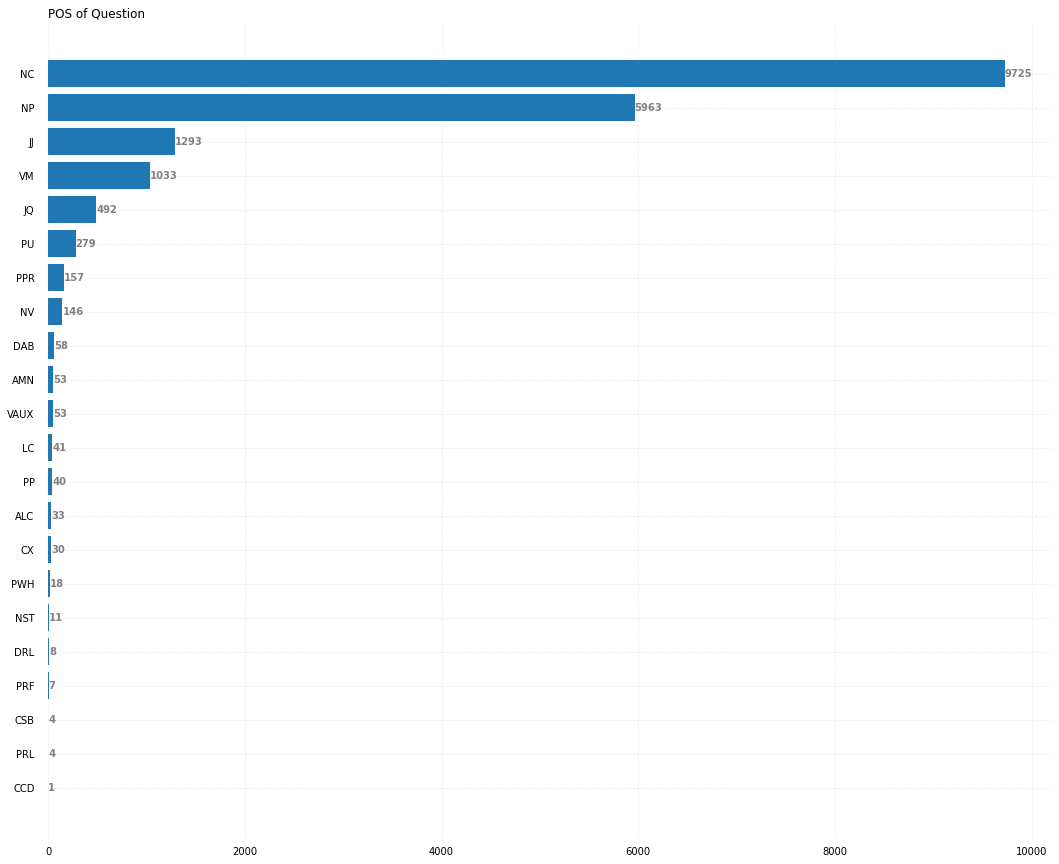

In [ ]:
fig, ax = plt.subplots(figsize =(18, 15))

# Horizontal Bar Plot
ax.barh(name,value)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('POS of Question',
             loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15," ",fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()

In [ ]:
import plotly.express as px
fig=px.histogram(temp_pos_que,title='POS of Question', x='POS', barmode='group',color='POS')
fig.show()

In [ ]:
count=0
ans_pos_list=[]
for ans in ans_list:
  res = bn_pos.tag(model_path, ans)
  for i in range(len(res)):
    if res[i][1]=='NP':
      ans_pos_list.append("Proper Noun")
    if res[i][1]=='NC':
      ans_pos_list.append("Collective Noun")
    if res[i][1]=='PU':
      ans_pos_list.append("Punctuation")
    if res[i][1]=='JJ':
      ans_pos_list.append("Adjective")
    if res[i][1]=='VM':
      ans_pos_list.append("Main Verb")
    if res[i][1]=='VAUX':
      ans_pos_list.append("Auxillary Verb")
    if res[i][1]=='NV':
      ans_pos_list.append("Verbal Noun")
    if res[i][1]=='NST':
      ans_pos_list.append("Spatio-temporal Noun")
    if res[i][1]=='LC':
      ans_pos_list.append("Conditional Participle")
    if res[i][1]=='PP':
      ans_pos_list.append("Postposition")
    if res[i][1]=='CX':
      ans_pos_list.append("Others Participle")
    if res[i][1]=='ALC':
      ans_pos_list.append("Location Adverb")
    if res[i][1]=='PPR':
      ans_pos_list.append("Pronominal Noun")
    if res[i][1]=='AMN':
      ans_pos_list.append("Manner Adverb")
    if res[i][1]=='ADB':
      ans_pos_list.append("Absolute Demonstrative")
    if res[i][1]=='PRF':
      ans_pos_list.append("Reflexive Pronoun")
    if res[i][1]=='PWH':
      ans_pos_list.append("Wh-Pronoun")
    if res[i][1]=='DRL':
      ans_pos_list.append("Relative Demonstrative")
    else:
      ans_pos_list.append(res[i][1])

In [ ]:
temp_pos_ans = pd.DataFrame(ans_pos_list)
temp_pos_ans.columns = ['POS']

In [ ]:
x = pd.value_counts(temp_pos_ans.values.flatten())
value = []
for i in range(len(x)):
  value.append(x.values[i])

print(value)

[12337, 12337, 4470, 3704, 3704, 2882, 2882, 2074, 2074, 1551, 1551, 1104, 886, 787, 787, 764, 764, 742, 606, 559, 518, 518, 390, 390, 355, 355, 203, 203, 176, 164, 164, 114, 114, 107, 51, 29, 29, 26, 8, 8, 6, 4, 4]


In [ ]:
name = x.keys()
name

Index(['Collective Noun', 'NC', 'RDF', 'PU', 'Punctuation', 'Proper Noun',
       'NP', 'VM', 'Main Verb', 'Adjective', 'JJ', 'RDX', 'RDS',
       'Postposition', 'PP', 'Pronominal Noun', 'PPR', 'JQ', 'CCD', 'CIN',
       'VAUX', 'Auxillary Verb', 'Verbal Noun', 'NV', 'Manner Adverb', 'AMN',
       'Location Adverb', 'ALC', 'DAB', 'CX', 'Others Participle', 'NST',
       'Spatio-temporal Noun', 'CSB', 'PRL', 'Conditional Participle', 'LC',
       'CCL', 'Reflexive Pronoun', 'PRF', 'Relative Demonstrative', 'PWH',
       'Wh-Pronoun'],
      dtype='object')

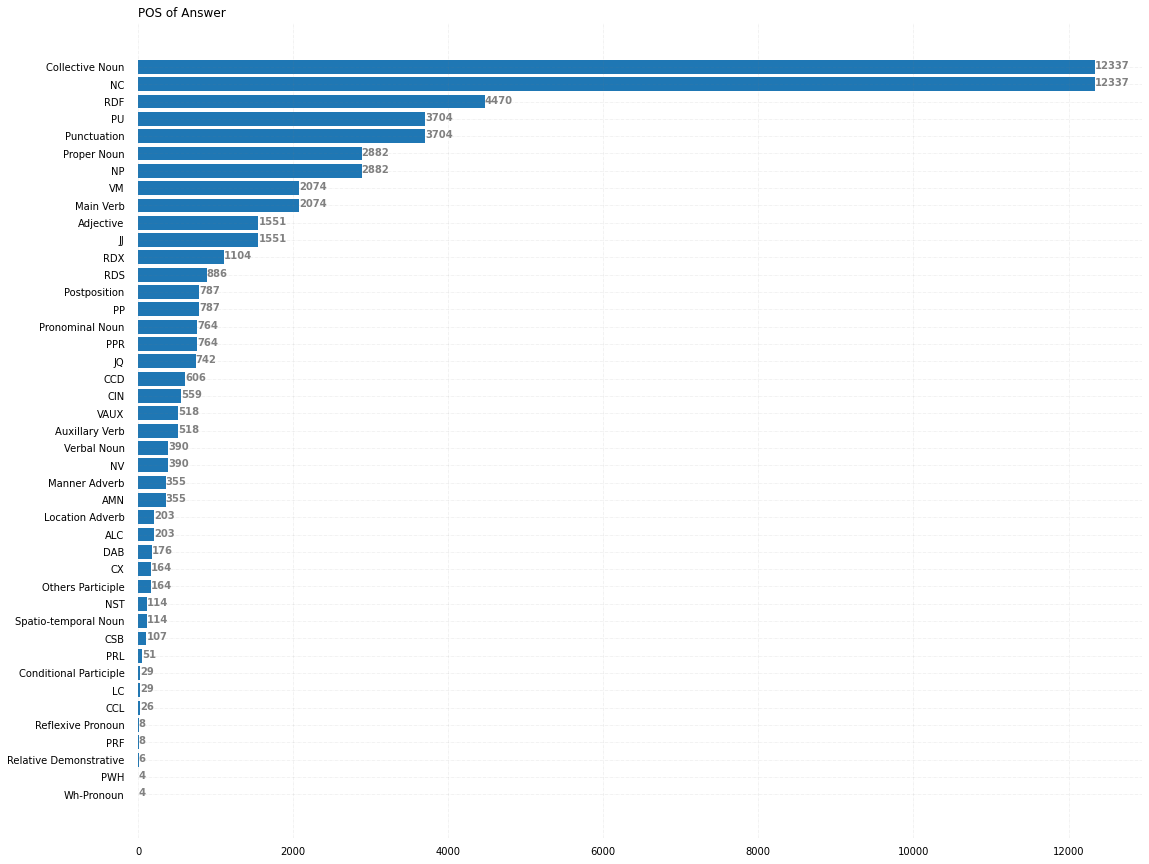

In [ ]:
fig, ax = plt.subplots(figsize =(18, 15))

# Horizontal Bar Plot
ax.barh(name,value)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Add Plot Title
ax.set_title('POS of Answer',
             loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15," ",fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)

# Show Plot
plt.show()

In [ ]:
import plotly.express as px
fig=px.histogram(temp_pos_ans,title='POS of Answer', x='POS', barmode='group',color='POS')
fig.update_layout(bargap=0.1)
fig.show()